In [3]:
import pandas as pd           
import matplotlib.pyplot as plt

[0.1428571428571428]


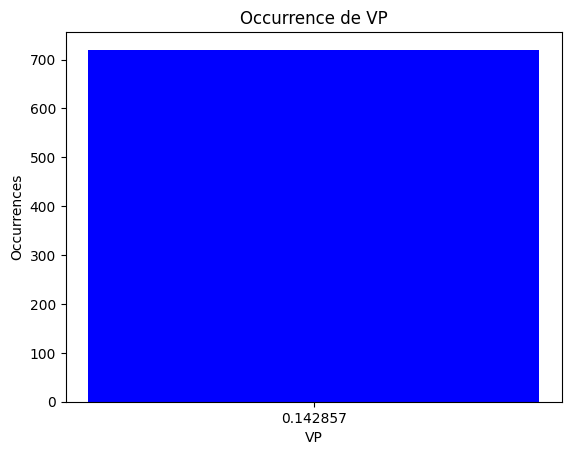

{0.1428571428571428: 720}

<Figure size 640x480 with 0 Axes>

In [4]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_mean_turn(df):
    turnmean=0
    j=0
    for i in df["numberOfTurn"] : 
        j=j+1
        turnmean=i+turnmean
        
    return turnmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de tours')
    plt.xlabel('Nombre de tours')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(data_set) :   
    
    donnees=analyse_differents_vp(data_set)
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Occurrence de VP')
    plt.xlabel('VP')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()


    

graph_Vp("csv_ug\data80.csv")
analyse_differents_vp("csv_ug\data80.csv")


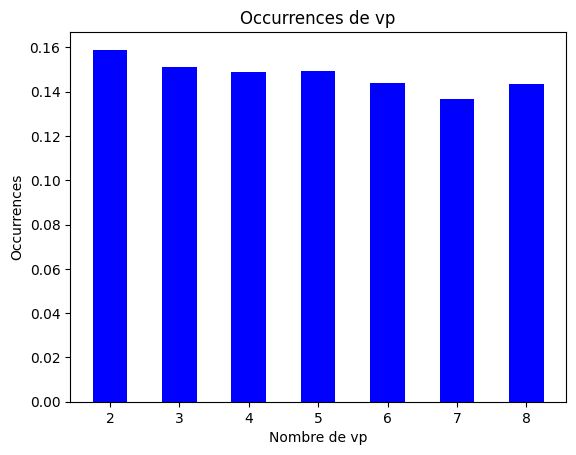

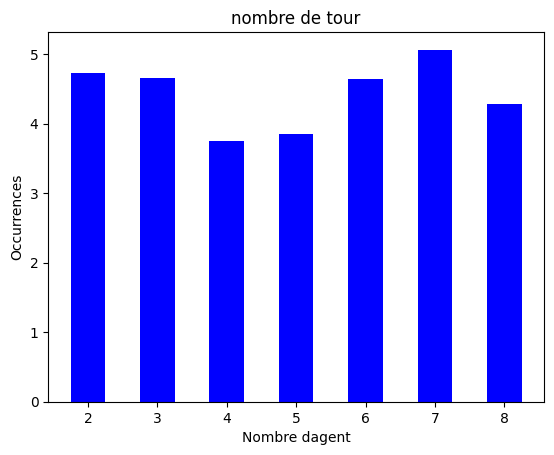

<Figure size 640x480 with 0 Axes>

In [5]:

import os


def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def all_graph_stat_turn(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de vp')
    plt.xlabel('Nombre de vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_turn(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('nombre de tour')
    plt.xlabel('Nombre dagent')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
liste_of_df=create_csv_link("csv_ug")   
affichage_graph_vp(all_graph_stat_vp(liste_of_df))
affichage_graph_turn(all_graph_stat_turn(liste_of_df))


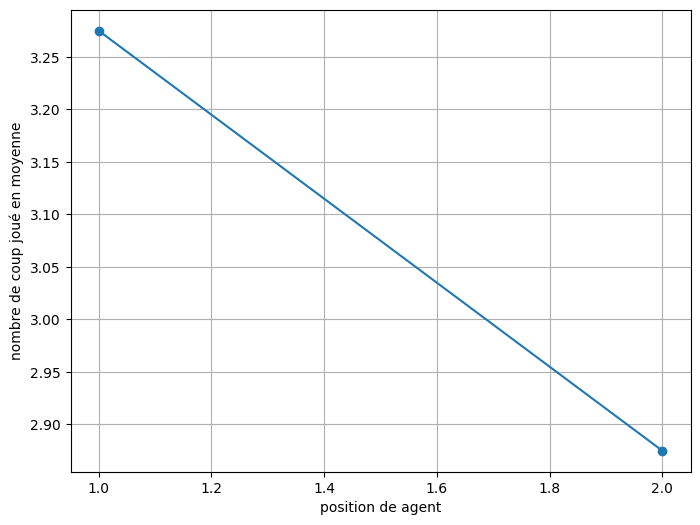

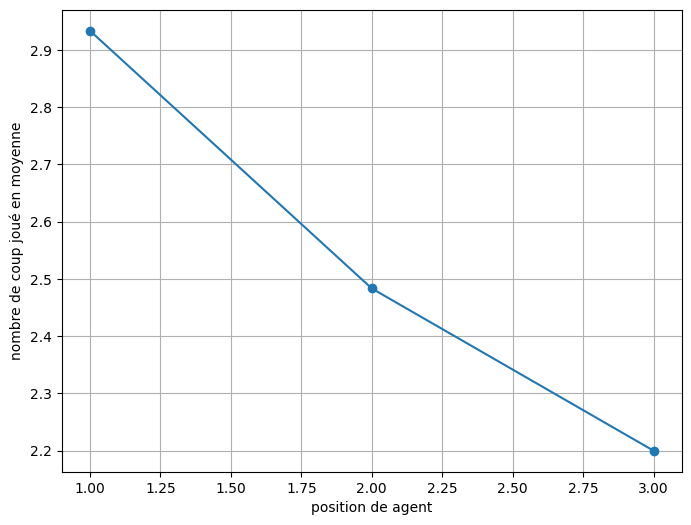

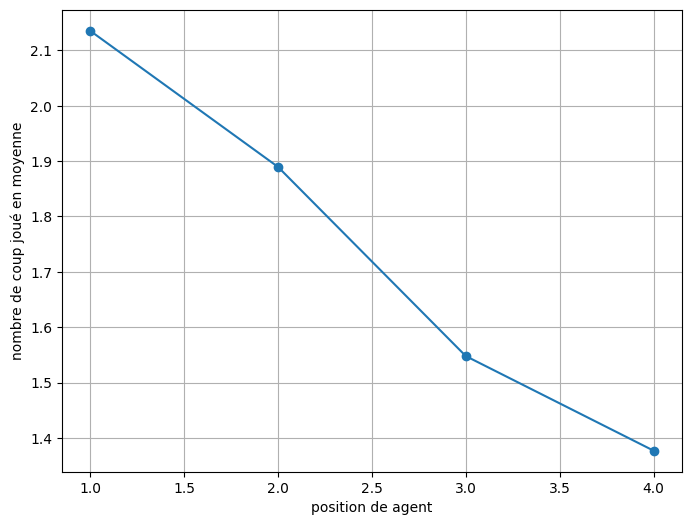

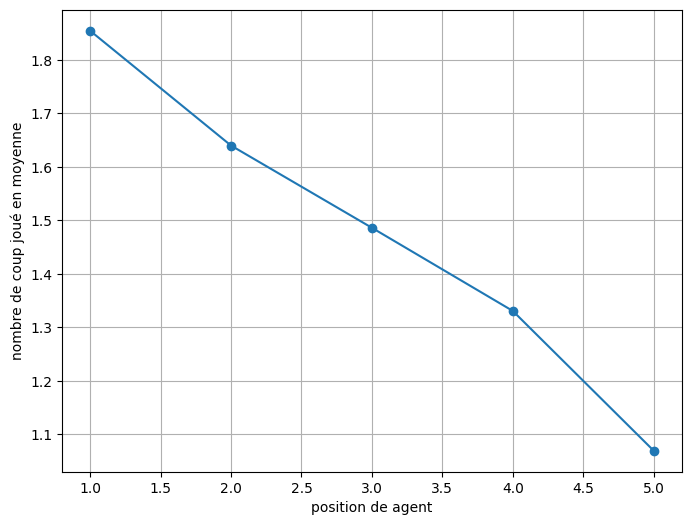

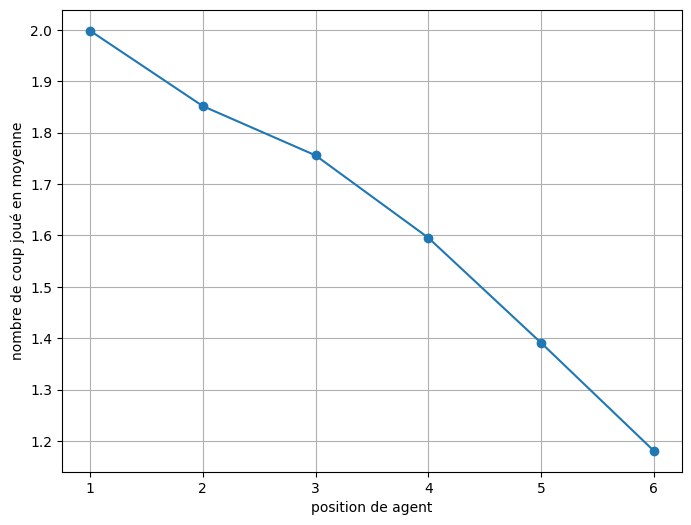

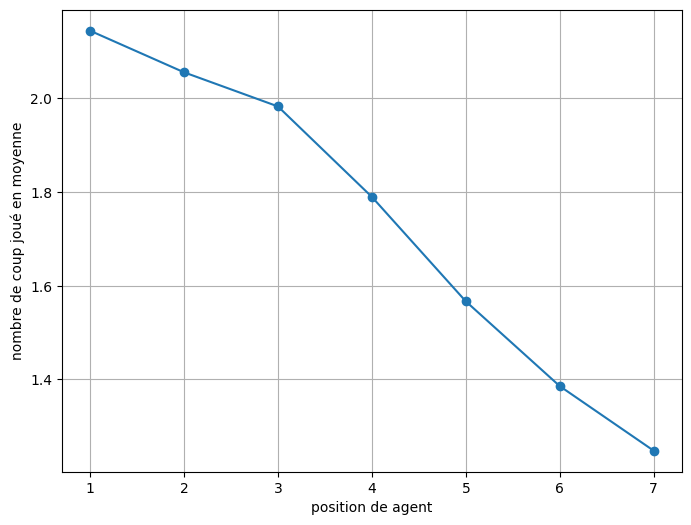

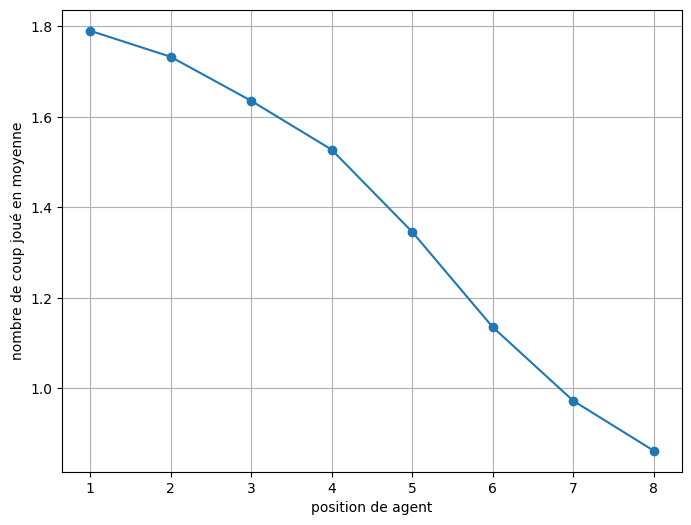

In [11]:

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn

def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
  
def createAgentNumber(number):
    test=[] 
    for i in liste_of_df:
        if len(i["order"][0].split(","))==number:
            test.append(i)
    return test

for i in range(2,9):
    afficher_graphique(number_argument_play(createAgentNumber(i),i))
    
  
        

In [21]:
def number_argument_play(dfs):
    
    dpn = []
    
    
    for df in dfs : 
            for i in range(len(df["order"][0].split(","))) :
                boolean=df[f"{i}"][0].split(",")[1]
                print(df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))])
                nb_coup_play=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))].split[1]
                nb_coup_possible=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))].split[3]
                print(boolean)
                print(boolean)
                dpn.append([boolean,nb_coup_play,nb_coup_possible])
    
   
    
    return dpn

number_argument_play(liste_of_df)

IndexError: list index out of range